In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [85]:
# Teste
altura_imagem = 231
comprimento = 195

In [86]:
# Criando o path para onde as imagens estão
famousim = "imagens_artistas/"
# Criando uma lista para adicionar as imagens
famous_images = []

# Fazendo um for loop para iterar sobre todas as imagens
for folder in (os.listdir(famousim)):
    folder_path = os.path.join(famousim, folder)
    for image in (os.listdir(folder_path)):
        # Adionanco o path com cada imagem para termos o arquivo da imgens
        path = os.path.join(famousim, folder ,image)
        # Lendo a imagem
        img = cv2.imread(path)
        # Transformando a imagem em preto e branco 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Adicionando a imgem na lista
        famous_images.append(img)

# Transformando a lista num array
famous_images_np = np.array(famous_images)
print(famous_images_np.shape)

(40, 231, 195)


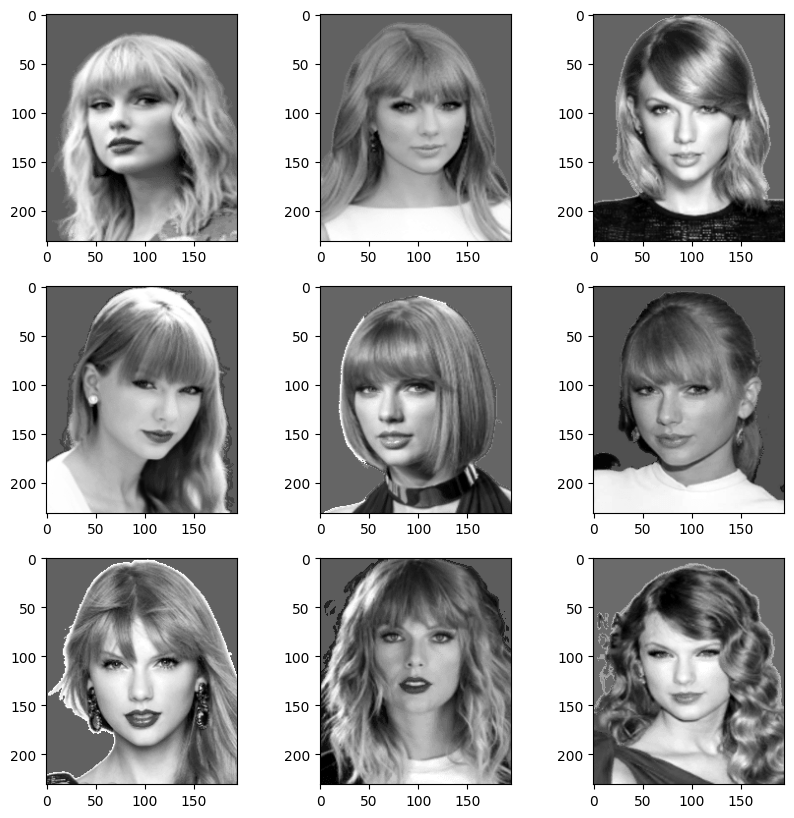

In [87]:
# Plotando a imagem
numero_imagens = 3
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(famous_images_np[count], cmap='gray')
        count += 1

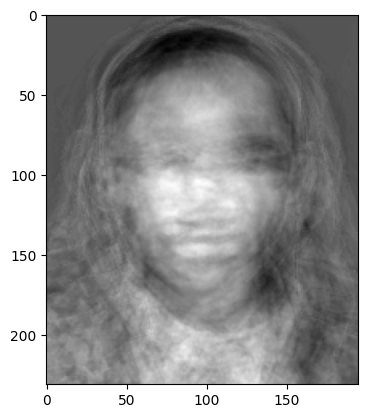

In [88]:
# Cada imagem está armazenada em "3 dimensões", cada foto está numa lista, e cada lista é uma lista de listas
# Vamos transformar a imagem num vetor coluna muito grande.
train_famous_np_matrix = famous_images_np.reshape(famous_images_np.shape[0], famous_images_np.shape[1]*famous_images_np.shape[2])
# calculamos a face média
mean_train_face = np.mean(train_famous_np_matrix, axis=0)
# Criamos uma matriz sem a a face média
centered_train_face = train_famous_np_matrix - mean_train_face

# Mostrando a face média
plt.figure()
plt.imshow(mean_train_face.reshape(altura_imagem,comprimento), cmap='gray')


In [89]:
# Decompomdo a matriz numa matriz SVD
U_Face_Famous, D_Face_Famous, V_Face_Famous = np.linalg.svd(centered_train_face, full_matrices=False)

In [90]:
print(D_Face_Famous.shape)
print(U_Face_Famous.shape)
print(V_Face_Famous.shape)
print(D_Face_Famous)
print(centered_train_face.shape)

(40,)
(40, 40)
(40, 45045)
[3.04773950e+04 2.01540056e+04 1.62013924e+04 1.56314358e+04
 1.49314945e+04 1.43107351e+04 1.35727172e+04 1.27030428e+04
 1.12089639e+04 1.06042994e+04 1.04737571e+04 9.52125284e+03
 9.07623715e+03 8.76312850e+03 8.55564283e+03 8.16740078e+03
 8.13328345e+03 7.99516031e+03 7.70872662e+03 7.40923855e+03
 7.19026204e+03 7.02845035e+03 6.86182544e+03 6.57048682e+03
 6.50255492e+03 6.34185893e+03 6.28173184e+03 6.07575363e+03
 5.89465481e+03 5.74495449e+03 5.66580131e+03 5.57018446e+03
 5.55406633e+03 5.31514076e+03 5.19696328e+03 4.99957402e+03
 4.86378516e+03 4.81345907e+03 4.65456666e+03 2.58717033e-11]
(40, 45045)


In [91]:
x = sum(D_Face_Famous)
print(x) 
(np.sum(D_Face_Famous[0:17]))/x

356725.384282525


0.6236903631881828

In [92]:
# Vamos obter a quantidade de componentes que queremos de nossa matriz. como temos apenas 17
C_Faces_TRAIN = V_Face_Famous[:17]
eigen_faces_train = C_Faces_TRAIN.reshape((-1, altura_imagem, comprimento))

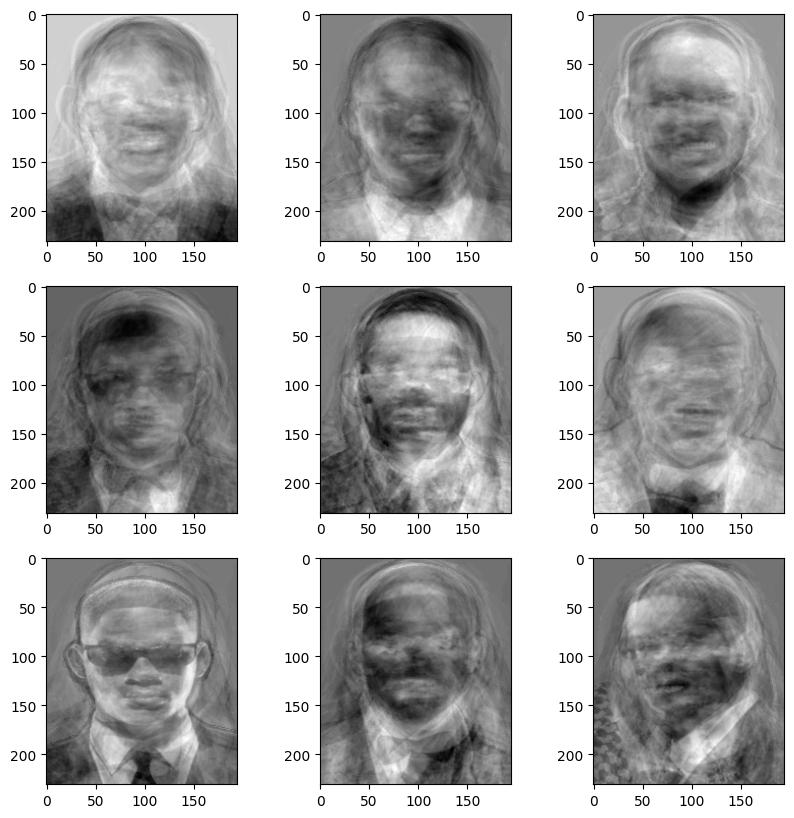

In [93]:
numero_imagens = 3
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(eigen_faces_train[count], cmap='gray')
        count += 1

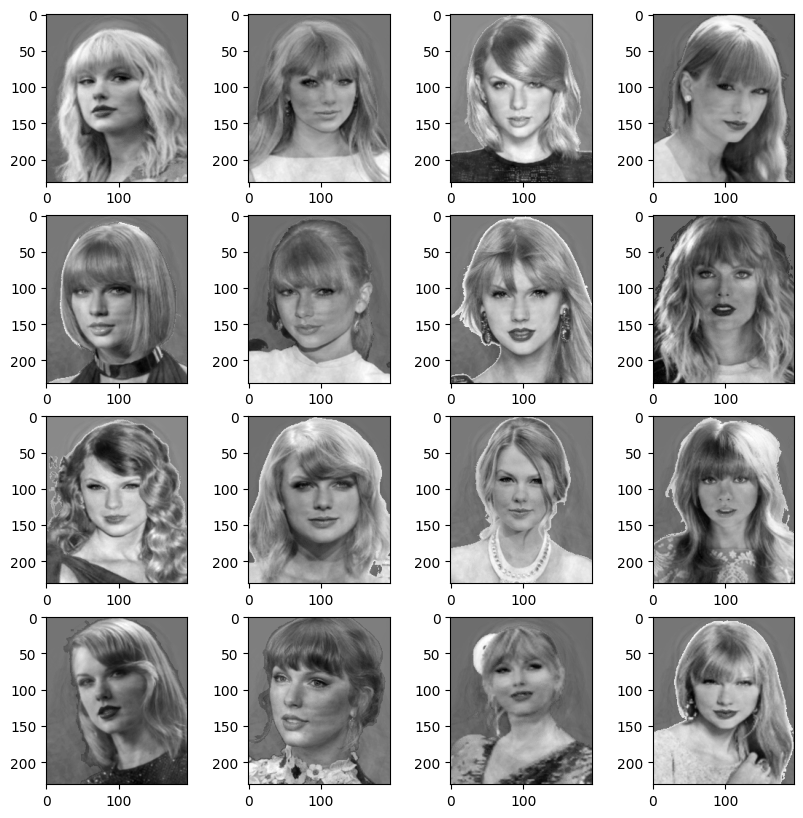

In [94]:
numero_imagens = 4
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(centered_train_face[count].reshape(altura_imagem,comprimento), cmap='gray')
        count += 1

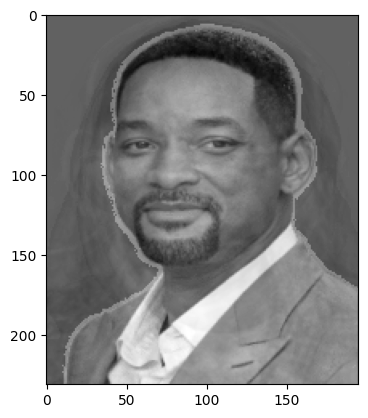

In [95]:
img = cv2.imread("imagens_artistas\WS\Captura de tela 2023-11-11 140222.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.array(img)
img = img.flatten()
img = img - np.mean(img)
coordinates = np.dot(V_Face_Famous, img)
new_img = np.dot(V_Face_Famous.T, coordinates)
new_img = new_img + mean_train_face

plt.figure()
plt.imshow(new_img.reshape(231,195), cmap='gray')
plt.show()

<BarContainer object of 40 artists>

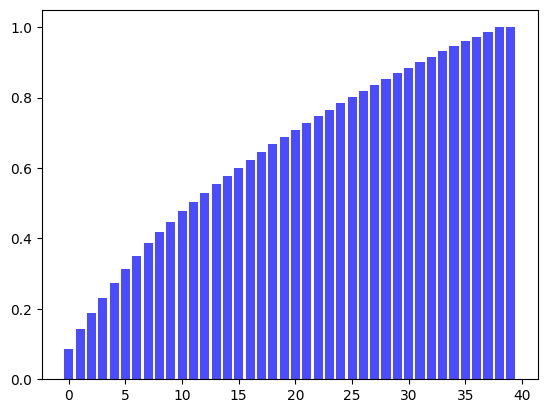

In [96]:
# O quanto cada autovalor representa do dado?
sum_all = sum(D_Face_Famous)
cummulative = np.cumsum(D_Face_Famous).round(2)
percentage = cummulative/sum_all
plt.bar(range(len(percentage)), percentage, color='blue', alpha=0.7)


In [129]:

dois_maiores_PCAs = V_Face_Famous[:2]

coordinates = []

for img in centered_train_face:
    coordinates_xy = np.dot(dois_maiores_PCAs, img)
    coordinates.append(coordinates_xy)
    


['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'black', 'black', 'black', 'black']


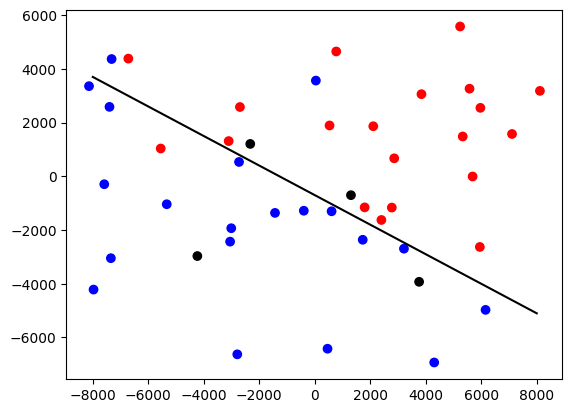

In [130]:
from mpl_toolkits.mplot3d import Axes3D

training_set = "imagens_datateste/"

# Iterate over images in the directory
for image_name in os.listdir(training_set):
    image_path = os.path.join(training_set, image_name)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.array(img)
    img = img.flatten()
    img = img - mean_train_face
    coordinates_new = np.dot(dois_maiores_PCAs, img)
    coordinates.append(coordinates_new)

# Transpose the list of coordinates for plotting
# Generate Colors for Plotting
colors = []
iteracao = 1
for number in range(len(coordinates)):
    if iteracao <= 20:
        colors.append("blue")
        iteracao += 1
    elif iteracao <= 40:
        colors.append("red")
        iteracao += 1
    else:
        colors.append("black")
        iteracao += 1

coordinates = np.array(coordinates).T

print(colors)

x_line = np.linspace(-8000, 8000, 100)
y_line = -0.55*x_line - 700

plt.scatter(coordinates[0], coordinates[1], c=colors)
plt.plot(x_line, y_line, color = "black")
plt.show()
